In [413]:
import pandas as pd
import numpy as np

In [414]:
bike=pd.read_csv("day.csv")

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## 1.Data Cleaning

#### drop columns
- instant:as it is the record index- 
dteday: as the features of date are alreeady there like yr month and weekda
- casual and registered as the are in cnt, because cnt is sum of both the valuesyes

In [415]:
bike=bike.drop(['instant','dteday','casual','registered'],axis=1)

Encode the category columns - season, weekday, weathersit

In [416]:
bike['season']=bike['season'].apply(lambda x:'spring' if x==1 else('summer' if x==2 else('fall' if x==3 else 'winter')))

In [417]:
bike['weekday']=bike['weekday'].apply(lambda x:'Sunday' if x==0 else('Monday' if x==1 else('Tuesday' if x==2 else ('Wednesday' if x==3 else('Thursday' if x==4 else('Friday' if x==5 else 'Saturday')))))) 

In [418]:
bike['weathersit']=bike['weathersit'].apply(lambda x:'Clear' if x==1 else('Mist + Cloudy' if x==2 else('Light Snow' if x==3 else 'Heavy Rain')))

In [419]:
bike.mnth = bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [420]:
bike.weathersit.value_counts()

weathersit
Clear            463
Mist + Cloudy    246
Light Snow        21
Name: count, dtype: int64

In [421]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Inspecting the data

In [422]:
bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [423]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [424]:
bike.nunique() 

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### Step-2: Visualising the data

In [425]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualising Numeric Variables

In [426]:
columns = bike.columns
columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [427]:
n_columns=[ 'temp', 'atemp', 'hum', 'windspeed','cnt']

c_columns=['yr','mnth', 'holiday', 'weekday',
       'workingday','season', 'weathersit']


In [428]:
n_data=bike[n_columns]
c_data=bike[c_columns]

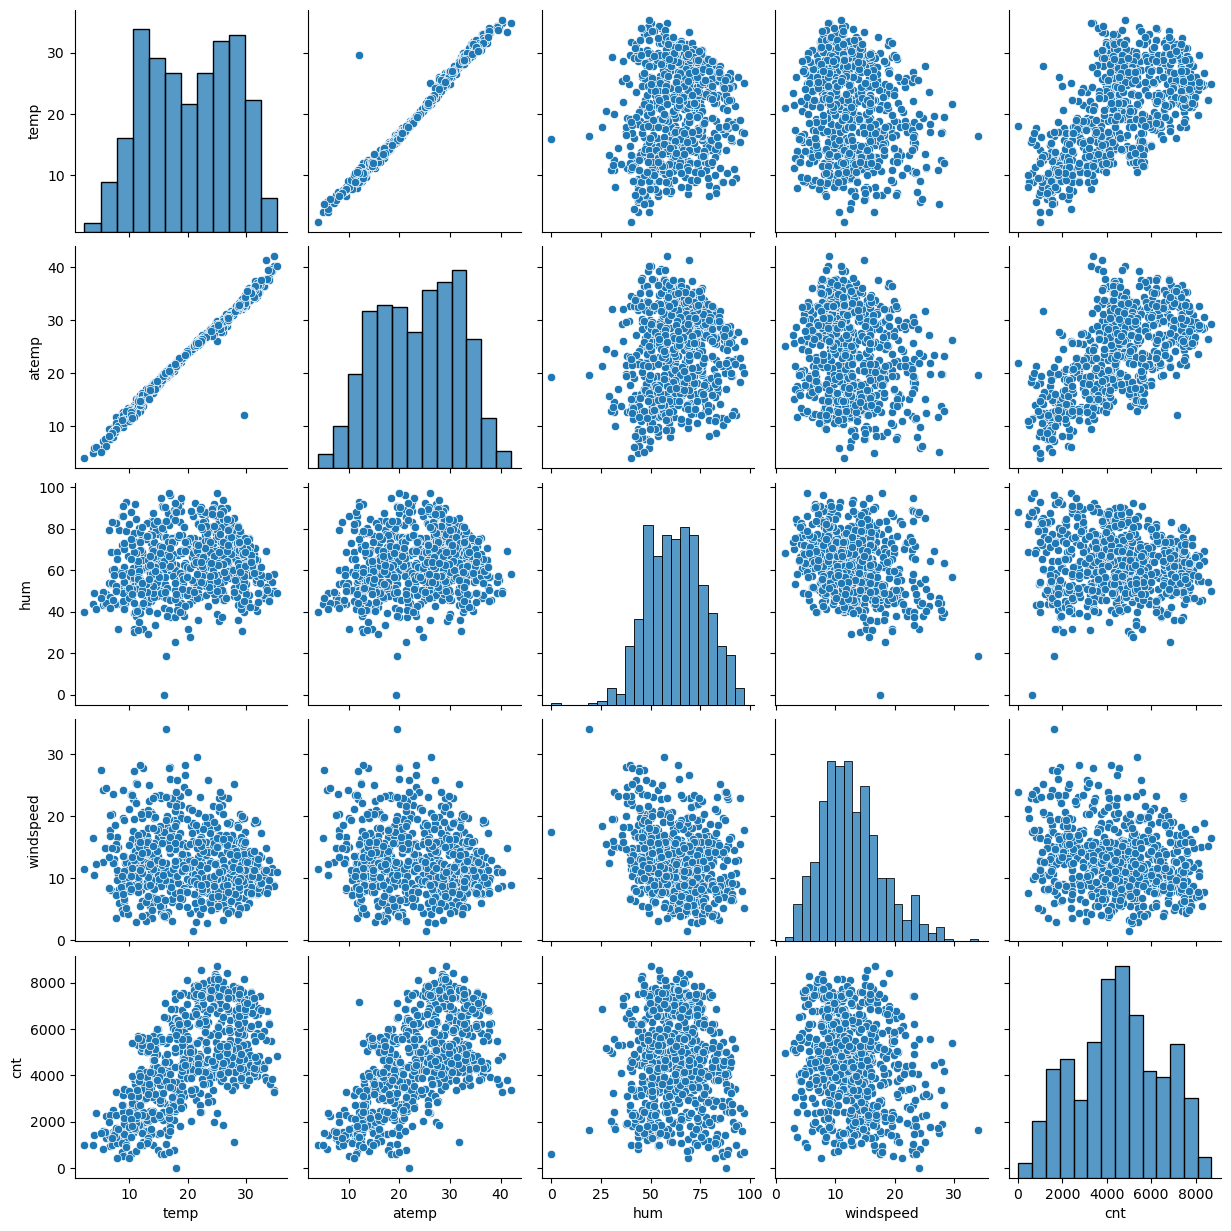

In [429]:
sns.pairplot(n_data)
plt.show()

- So from the above plots we can clearly understand that temp and atemp are having high correlation- 
And from the plots we can also say that there is alinear relationship between TEMP and ATEMP

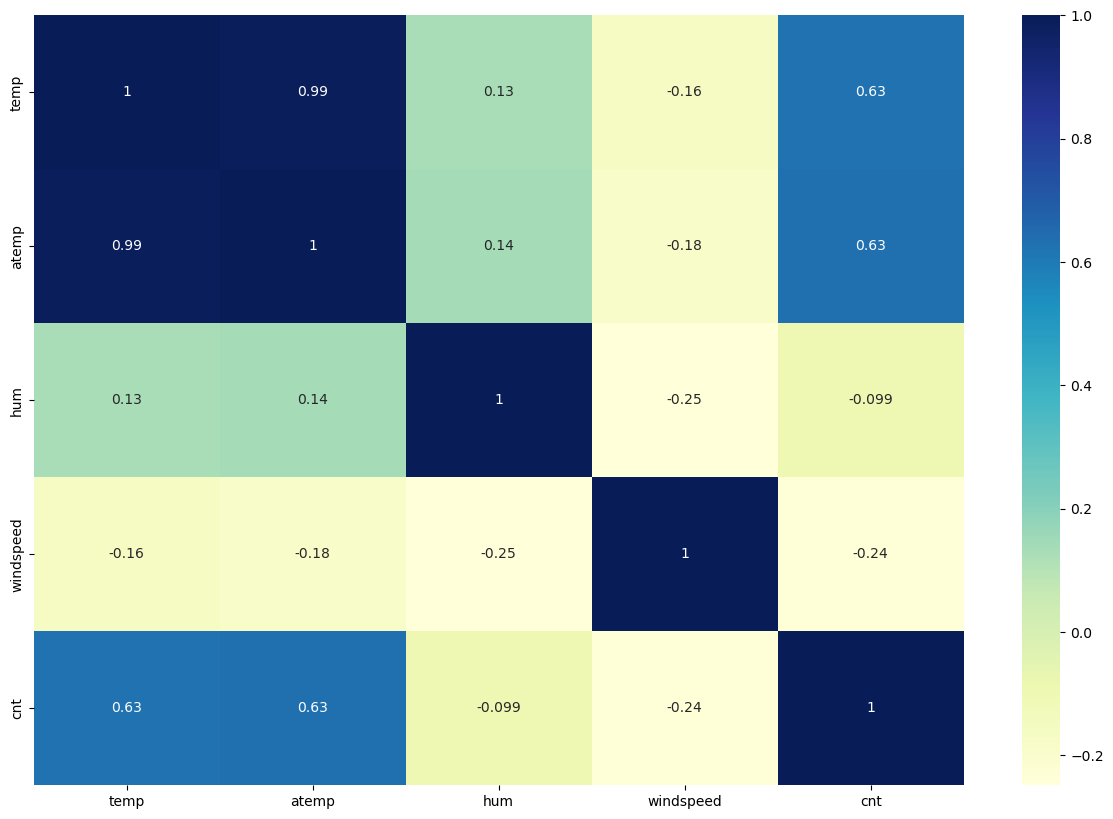

In [430]:
# Heatmap for correlation between numeric variables

plt.figure(figsize=(15,10))
sns.heatmap(n_data.corr(),cmap="YlGnBu",annot=True)
plt.show()

#### Visualising Categorical Variables

<Axes: xlabel='weathersit', ylabel='cnt'>

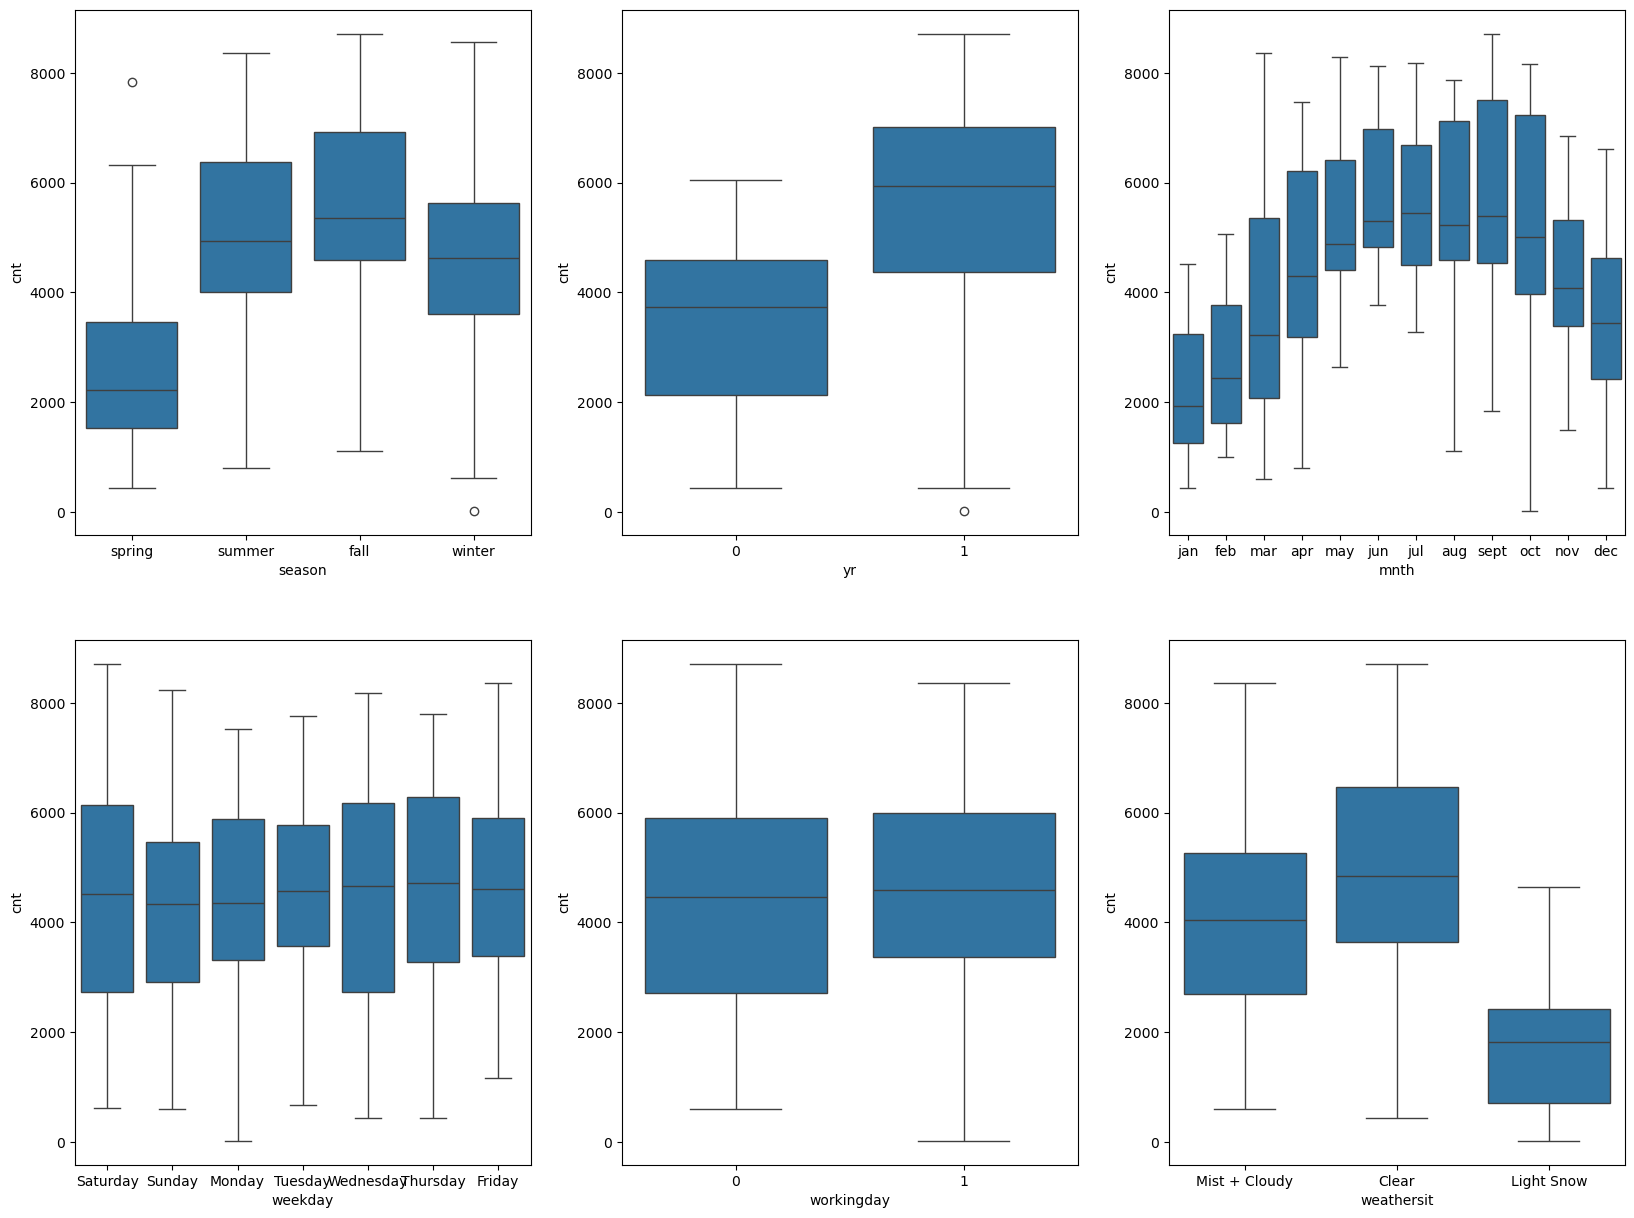

In [431]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bike)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bike)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike)

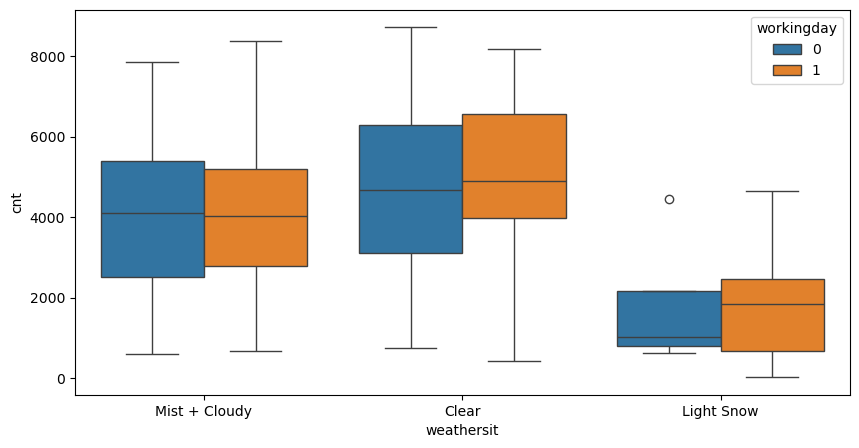

In [432]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'workingday', data = bike)
plt.show()

### 3.Data Preperation

#### Creating Dummy variables

In [433]:
bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday"],drop_first=True)
bike = pd.get_dummies(data=bike,columns=["weathersit"]).astype(int)

In [434]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Clear',
       'weathersit_Light Snow', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [435]:
pd.set_option('display.max_columns', None)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light Snow,weathersit_Mist + Cloudy
0,0,0,0,14,18,80,10,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14,17,69,16,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8,9,43,16,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8,10,59,10,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9,11,43,12,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


### Step 4: Splitting the Data into Training and Testing Sets

In [436]:
from sklearn.model_selection import train_test_split

#y to contain only target variable
y=bike.pop('cnt')

#X is all remainign variable also our independent variables
X=bike

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [437]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


#### Rescaling the Features

This time, we will use MinMax scaling.

In [438]:
from sklearn.preprocessing import MinMaxScaler

In [439]:
scaler = MinMaxScaler()

In [440]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [441]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light Snow,weathersit_Mist + Cloudy
653,1,0,1,0.515152,0.512821,0.567010,0.31250,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
576,1,0,1,0.818182,0.769231,0.721649,0.28125,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.424242,0.435897,0.639175,0.25000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.242424,0.205128,0.494845,0.65625,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.393939,0.384615,0.494845,0.18750,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


### Build model using RFE

In [442]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [443]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [444]:
#Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [445]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 6),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 3),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 11),
 ('weekday_Wednesday', False, 15),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [446]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [447]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [448]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weathersit_Clear', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [449]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [450]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_Saturday', 'weathersit_Clear',
       'weathersit_Light Snow']]

In [451]:
X_train_rfe.shape

(511, 15)

### Model 1

In [452]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [453]:
#Selected columns for Model 1 - all columns selected by RFE

cols = ['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_Saturday', 'weathersit_Clear',
       'weathersit_Light Snow']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.9
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.99e-188
Time:                        23:50:35   Log-Likelihood:                -4122.7
No. Observations:                 511   AIC:                             8277.
Df Residuals:                     495   BIC:                             8345.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2084.96

### Model 2

In [454]:
# Dropping the variable hum as it has high VIF

cols2 = ['yr', 'workingday', 'atemp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_Saturday', 'weathersit_Clear',
       'weathersit_Light Snow']

build_model(cols2)
get_vif(cols2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.4
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          3.22e-186
Time:                        23:50:35   Log-Likelihood:                -4130.3
No. Observations:                 511   AIC:                             8291.
Df Residuals:                     496   BIC:                             8354.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1192.34

### Model 3

In [455]:
# Dropping the variable 'mnth_mar' as it has high VIF

cols3 = ['yr', 'workingday', 'atemp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weekday_Saturday', 'weathersit_Clear',
       'weathersit_Light Snow']

build_model(cols3)
get_vif(cols3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.48e-186
Time:                        23:50:36   Log-Likelihood:                -4132.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     497   BIC:                             8352.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1204.12

### Model 4

In [456]:
cols4 = ['yr', 'workingday','atemp','windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weekday_Saturday', 'weathersit_Clear',
       'weathersit_Light Snow']

build_model(cols4)
get_vif(cols4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.48e-186
Time:                        23:50:39   Log-Likelihood:                -4132.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     497   BIC:                             8352.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1204.12

In [457]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [458]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols4],y_train)
print(lr.intercept_,lr.coef_)

1204.124884226857 [ 2048.16903921   474.12875054  3913.82090932 -1135.68930622
 -1076.00705767   525.78863596  -368.01529219  -543.90752057
  -419.38992976   441.87469369   572.51369763   725.80812158
 -1821.14866085]


## Residual analysis

In [459]:
y_train_pred = lr.predict(X_train[cols4])

In [460]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

C:\Users\user\AppData\Local\Temp\ipykernel_11480\3357394689.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(act-pred)


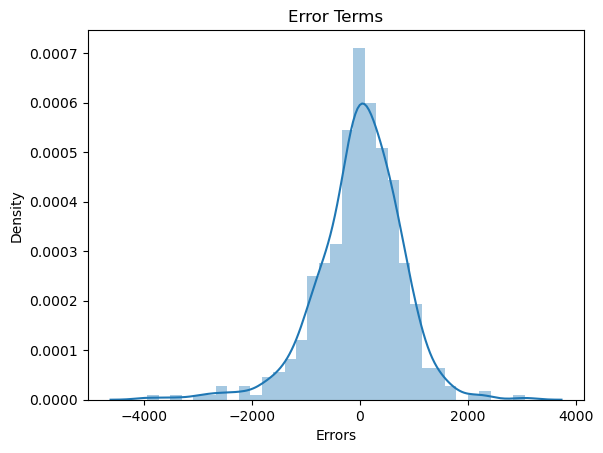

In [461]:
plot_res_dist(y_train, y_train_pred)

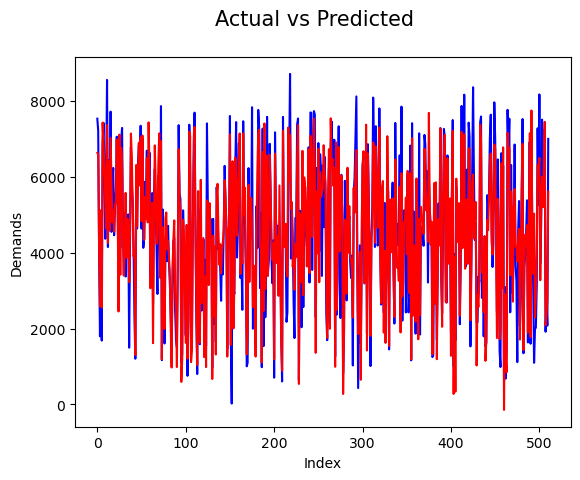

In [462]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Model predictions

#### R-Squared value for train predictions

In [463]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.837578897207107

### Prediction of values on test dataset

In [464]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [465]:
cols4 = ['yr', 'workingday','atemp','windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weekday_Saturday', 'weathersit_Clear',
       'weathersit_Light Snow']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols4])

#### R-Squared value for test predictions

In [466]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8235268282711457

In [467]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8235268282711457

Text(0, 0.5, 'y_pred')

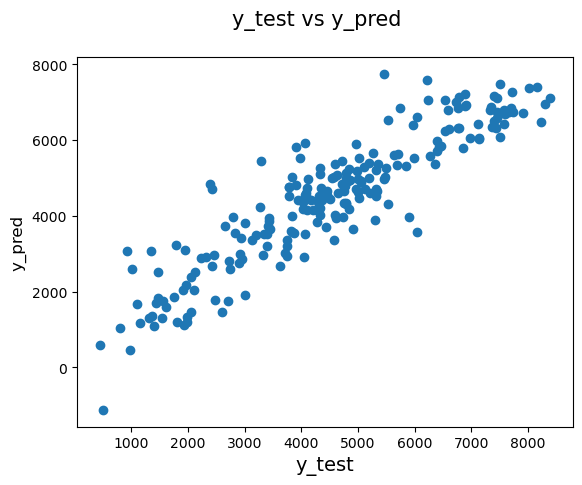

In [468]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

Conclusion:

Significant variables to predict the demand for shared bikes* 'yr'
* 'workingday'
* 'atemp'
* 'windspeed'
* 'season_spring'
* 'season_winter'
* 'mnth_dec'
* 'mnth_jul'
* 'mnth_nov',
* 'mnth_sept'
* 'weekday_Saturday'
* 'weathersit_Clear'
* 'weathersit_Light Snow'ist + Cloud